Hamed Ajorlou 97101167

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from skimage.feature import local_binary_pattern , hog
from skimage.filters import gabor
import cv2
import os 
from skimage import io
import matplotlib.pyplot as plt

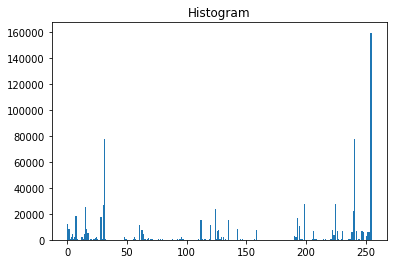

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

image = cv2.imread('image.jpg' , cv2.IMREAD_GRAYSCALE)
LBP = local_binary_pattern(image=image , R=1, P=8)
np.histogram(LBP)
LBP_flat = LBP.flatten()
plt.hist(LBP_flat , bins=256 )
plt.title('Histogram')
plt.show()

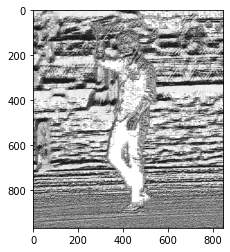

In [ ]:
plt.imshow(LBP,cmap='gray')

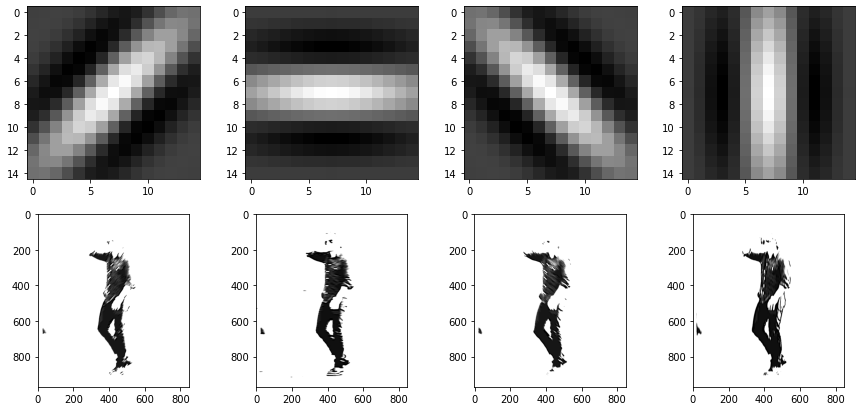

In [ ]:
plt.figure(figsize=(15,7))
for i in range(0,4):
    Gaborkernel = cv2.getGaborKernel((15, 15), 3, (i+1)*np.pi/4, 10.0, 0.5 , 0)
    result  = cv2.filter2D(src=image, ddepth=-1, kernel=Gaborkernel)
    plt.subplot(2,4,i+1)
    plt.imshow(Gaborkernel, cmap = 'gray')
    plt.subplot(2,4,i+5)
    plt.imshow(result, cmap = 'gray')

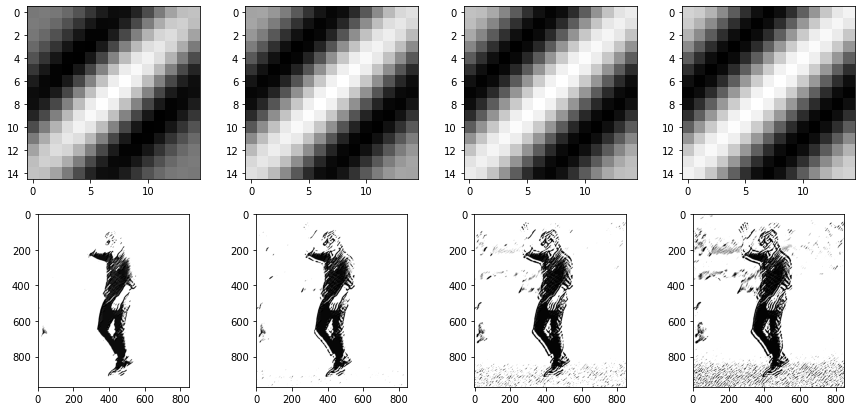

In [ ]:
plt.figure(figsize=(15,7))
for i in range(4):
    Gaborkernel_45 = cv2.getGaborKernel((15, 15),2*i+5, np.pi/4, 10.0, 0.5 , 0)
    result_45 = cv2.filter2D(src=image, ddepth=-1, kernel=Gaborkernel_45)
    plt.subplot(2,4,i+1)
    plt.imshow(Gaborkernel_45, cmap = 'gray')
    plt.subplot(2,4,i+5)
    plt.imshow(result_45, cmap = 'gray')

as sigma increases , picture gets clear and more details gets obvious.

(453600,)


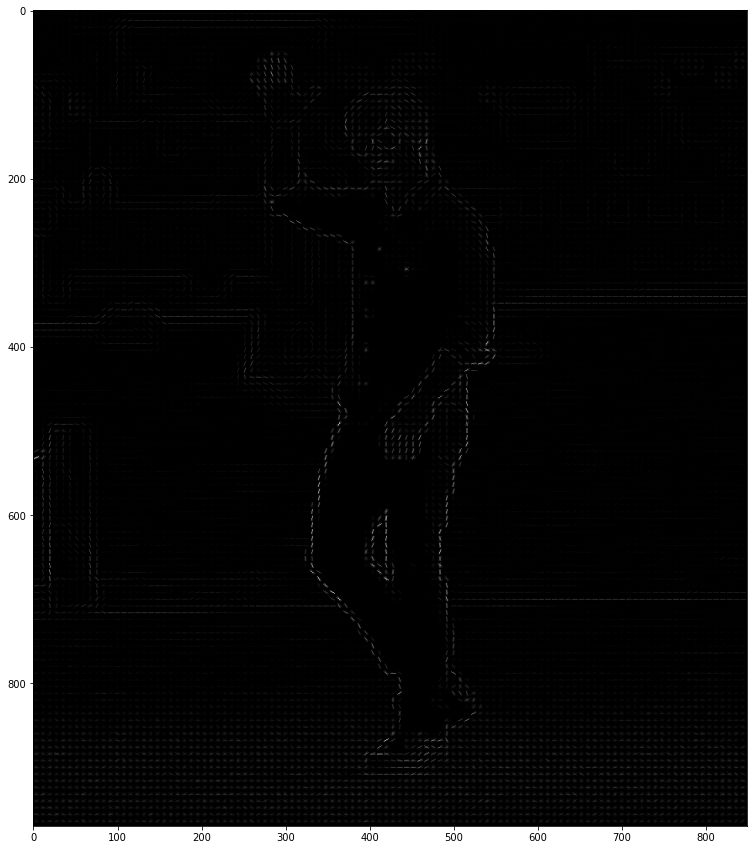

In [ ]:
Hog, im = hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True)
plt.figure(figsize=(15,15))
print(Hog.shape)
plt.imshow(im , cmap = 'gray')

In [ ]:
path_happy= '/content/drive/MyDrive/Cohn-Kanade/happy'
path_disgust = '/content/drive/MyDrive/Cohn-Kanade/disgust'

hap_list = os.listdir(path_happy)
disg_list = os.listdir(path_disgust)

X_hap = []
y_hap = []
for i in hap_list :
    X_hap.append(io.imread(os.path.join(path_happy,i),as_gray=True)[220:470,:].flatten())
    y_hap.append(0)

X_disg = []
y_disg = []

for i in disg_list :
    X_disg.append(io.imread(os.path.join(path_disgust,i),as_gray=True)[220:470,:].flatten())
    y_disg.append(1)

X_hap = np.array(X_hap)
X_disg = np.array(X_disg)
X_hap_train, X_hap_test, y_hap_train, y_hap_test = train_test_split(X_hap, y_hap, train_size=65 ,shuffle=True, random_state=21)
X_disg_train, X_disg_test, y_disg_train, y_disg_test = train_test_split(X_disg, y_disg, train_size=35  ,shuffle=True, random_state=21)
X_train = np.concatenate((X_hap_train,X_disg_train))
X_test = np.concatenate((X_hap_test,X_disg_test))
y_train = np.concatenate((y_hap_train,y_disg_train))
y_test = np.concatenate((y_hap_test,y_disg_test))
print(f'X_hap_test : {X_hap_test.shape}\n X_disg_test: {X_disg_test.shape} ')

X_hap_test : (20, 75000)
 X_disg_test: (12, 75000) 


In [ ]:
print(f'X_train : {X_train.shape}\n X_test:{X_test.shape}')
print(y_train.shape)

X_train : (100, 75000)
 X_test:(32, 75000)
(100,)


0


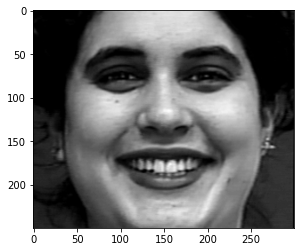

In [ ]:
i = np.arange(X_train.shape[0])
np.random.shuffle(i)
X_train_s = X_train[i]
y_train_s = y_train[i]
plt.imshow(X_train_s[0].reshape(250,300) , cmap = 'gray')
print(y_train_s[0])

(38880,)


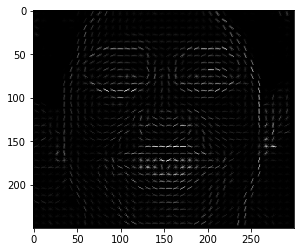

In [ ]:
Hog,im = hog(X_train_s[0].reshape(250,300),orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True)
print(Hog.shape)
plt.imshow(im , cmap = 'gray')

In [ ]:
X_train_hog = np.zeros((len(Hog),X_train_s.shape[0]))
print(X_train_hog.shape)
y_train_hog = (y_train_s.reshape(1,len(y_train)))
print(y_train_hog.shape)
X_test_hog = np.zeros((len(Hog),X_test.shape[0]))
print(X_test_hog.shape)
y_test_hog = (y_test.reshape(1,len(y_test)))
print(y_test_hog.shape)

(38880, 100)
(1, 100)
(38880, 32)
(1, 32)


In [ ]:
for i in range(X_train_s.shape[0]):
    image = X_train_s[i].reshape(250,300)
    h = hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2))
    X_train_hog[:,i] = h.reshape(1,len(h))
for i in range(X_test.shape[0]):
    image = X_test[i].reshape(250,300)
    h = hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2))
    X_test_hog[:,i] = h.reshape(1,len(h))

In [ ]:
print(X_train_hog.T.shape)
print(X_test_hog.T.shape)

(100, 38880)
(32, 38880)


In [ ]:
parameters = {'C':[0.01 , 0.1 , 1 , 10 , 100]}
linear_svc = LinearSVC()
clf = GridSearchCV(linear_svc, parameters)
clf.fit(X_train_hog.T, y_train_hog.T)
clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 0.1}

In [ ]:
Final_Linear_SVM = LinearSVC(C = 0.1)
Final_Linear_SVM.fit(X_train_hog.T, y_train_hog.T)
y_pred = Final_Linear_SVM.predict(X_test_hog.T)
Final_Linear_SVM.score(X_test_hog.T,y_test_hog.T)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [ ]:
matrix = confusion_matrix(y_test_hog.T,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)
tp, fn = confusion_matrix(y_test_hog.T,y_pred,labels=[1,0])
print('Outcome values : \n', tp, fn)
matrix = classification_report(y_test_hog.T,y_pred,labels=[1,0])
print('Classification report : \n',matrix)


Confusion matrix : 
 [[12  0]
 [ 0 20]]
Outcome values : 
 [12  0] [ 0 20]
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           0       1.00      1.00      1.00        20

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



as we see , performance of model is good and precision is at good level.